# 공공 인공지능 Open API 활용

In [1]:
with open('etriaikey.txt') as file:
    ai_key = file.read()

### 객체 검출

#### 1. 하나의 객체 검출

In [2]:
# JFIF 타입은 JPG로 변경
img_file = '사진/고양이.jpg'
img_type = img_file.split('.')[-1]
img_type = 'jpg' if img_type == 'jfif' else img_type

In [3]:
import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [4]:
with open(img_file, 'rb') as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")
img_contents[:10]

'/9j/4AAQSk'

In [5]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [6]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [7]:
response.status

200

In [8]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.981606","x":"20","y":"0","width":"584","height":"435"}]}}'

In [9]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.981606',
    'x': '20',
    'y': '0',
    'width': '584',
    'height': '435'}]}}

In [11]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.981606',
 'x': '20',
 'y': '0',
 'width': '584',
 'height': '435'}

- 시각화

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

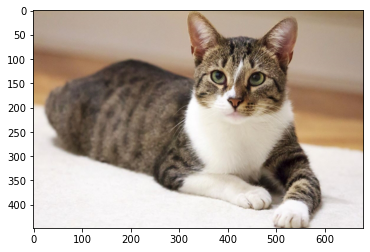

In [20]:
img = Image.open(img_file)
plt.imshow(img);

In [21]:
draw = ImageDraw.Draw(img)
obj = obj_list[0]
name = obj['class']
x, y = int(obj['x']), int(obj['y'])
w, h = int(obj['width']), int(obj['height'])
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=1)
draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))

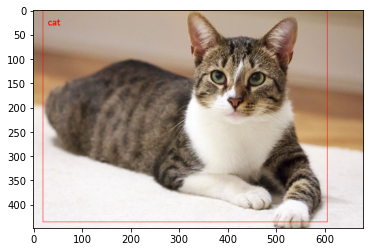

In [22]:
plt.imshow(img);

#### 2. 여러개의 객체 검출

In [23]:
img_file = '사진/meme.jpg'
img_type = img_file.split('.')[-1]
img_type = 'jpg' if img_type == 'jfif' else img_type

In [24]:
with open(img_file, 'rb') as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [25]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [26]:
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [27]:
response.status

200

In [30]:
result = json.loads(response.data)
obj_list = result['return_object']['data']

In [33]:
img = Image.open(img_file)
draw = ImageDraw.Draw(img)
for obj in obj_list:
    name = obj['class']
    x, y = int(obj['x']), int(obj['y'])
    w, h = int(obj['width']), int(obj['height'])
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=3)
    draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf',30), fill=(255,0,0))

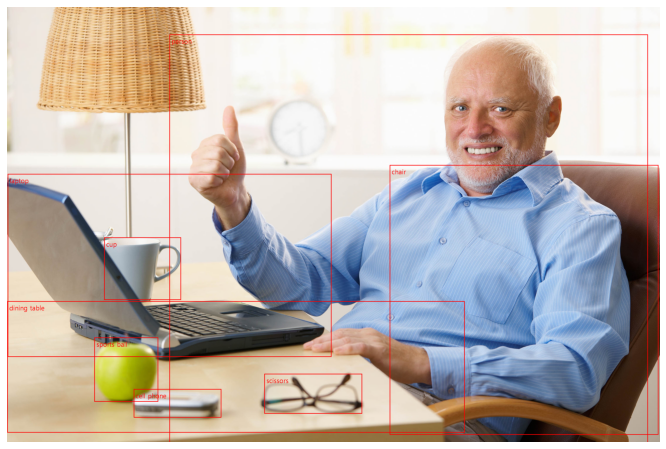

In [35]:
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off');